In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
crypto_currency_df = pd.read_csv('crypto_data.csv')
crypto_currency_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

In [4]:
crypto_currency_df.shape

(1252, 7)

In [5]:
crypto_currency_df.info

<bound method DataFrame.info of      Unnamed: 0        CoinName Algorithm  IsTrading ProofType  \
0            42         42 Coin    Scrypt       True   PoW/PoS   
1           365         365Coin       X11       True   PoW/PoS   
2           404         404Coin    Scrypt       True   PoW/PoS   
3           611       SixEleven   SHA-256       True       PoW   
4           808             808   SHA-256       True   PoW/PoS   
...         ...             ...       ...        ...       ...   
1247        XBC     BitcoinPlus    Scrypt       True       PoS   
1248       DVTC      DivotyCoin    Scrypt      False   PoW/PoS   
1249       GIOT     Giotto Coin    Scrypt      False   PoW/PoS   
1250       OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS   
1251       PUNK       SteamPunk       PoS      False       PoS   

      TotalCoinsMined TotalCoinSupply  
0        4.199995e+01              42  
1                 NaN      2300000000  
2        1.055185e+09       532000000  
3              

In [6]:
crypto_currency_df = crypto_currency_df[crypto_currency_df['IsTrading'] == True]
crypto_currency_df = crypto_currency_df.drop(columns ='IsTrading')

In [7]:
crypto_currency_df.isnull().sum()
crypto_currency_df = crypto_currency_df.dropna()

In [8]:
crypto_currency_df = crypto_currency_df[crypto_currency_df["TotalCoinsMined"]> 0]
crypto_currency_df = crypto_currency_df.drop(columns ='CoinName')
crypto_currency_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [9]:
X = pd.get_dummies(crypto_currency_df, columns=['Algorithm', 'ProofType'])
X = X.drop(columns ='Unnamed: 0')
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = StandardScaler()
scaled_crypto_currency = scaler.fit_transform(X)

## Dimensionality Reduction

In [13]:
# Initialize PCA model
pca = PCA(n_components=.9)

crypto_pca = pca.fit_transform(scaled_crypto_currency)

In [15]:
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,-2.368958e-15,-1.445089e-15,-4.418027e-15,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,-1.116486e-15,-1.711730e-15,-4.312173e-15,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,1.027446e-13,-9.066971e-15,-2.310298e-15,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,1.471950e-14,4.186262e-15,1.070382e-14,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,1.358106e-13,1.023453e-13,1.566598e-13,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14


In [16]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [18]:
tsne = TSNE(learning_rate=35)

In [21]:
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(532, 2)

In [23]:
# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

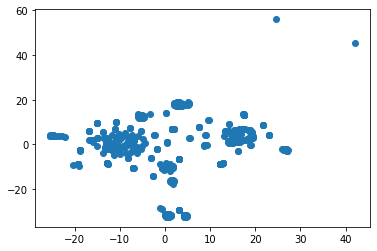

In [25]:
plt.scatter(x, y)
plt.show()

## Cluster Analysis with K-Means

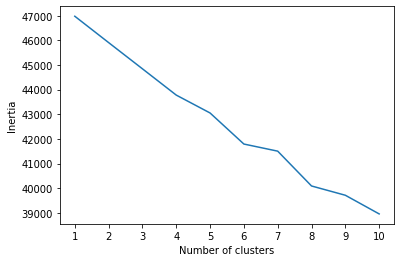

In [26]:
 inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Brief Summary

#### Based on the above results, it seems like cryptocurrencies can be clustered together, but, as seen in the scatter plot ar. The above elbow curve demonstrates that there is around a total nine clusters that can be made out from the dataset. 